In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 23

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 23)                253       
                                                                 
Total params: 1323 (5.17 KB)
Trainable params: 1323 (5.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
42/45 [===========================>..] - ETA: 0s - loss: 3.1631 - accuracy: 0.0433
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
45/45 [==============================] - 3s 21ms/step - loss: 3.1601 - accuracy: 0.0441 - val_loss: 3.0702 - val_accuracy: 0.1043
Epoch 2/1000
21/45 [=============>................] - ETA: 0s - loss: 3.0669 - accuracy: 0.0885

c:\users\adity\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/45 [==========================>...] - ETA: 0s - loss: 3.0464 - accuracy: 0.1115
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
45/45 [==============================] - 0s 9ms/step - loss: 3.0415 - accuracy: 0.1144 - val_loss: 2.9506 - val_accuracy: 0.1596
Epoch 3/1000
39/45 [=========================>....] - ETA: 0s - loss: 2.9210 - accuracy: 0.1605
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
45/45 [==============================] - 0s 9ms/step - loss: 2.9091 - accuracy: 0.1646 - val_loss: 2.7343 - val_accuracy: 0.2429
Epoch 4/1000
43/45 [===========================>..] - ETA: 0s - loss: 2.7023 - accuracy: 0.2175
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
45/45 [==============================] - 0s 9ms/step - loss: 2.6955 - accuracy: 0.2189 - val_loss: 2.4395 - val_accuracy: 0.2929
Epoch 5/1000
42/45 [===========================>..] - ETA: 0s - loss: 2.5205 - accuracy: 0.2396
Epoch 5: savin

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.8567


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 268ms/step
[9.9399418e-01 1.3979039e-11 1.3735844e-07 2.4520382e-03 9.7226317e-04
 2.5536574e-03 4.3249275e-18 2.7016063e-11 4.4386548e-09 2.9667950e-07
 2.0808138e-11 3.4230615e-07 9.2199868e-12 5.4202384e-14 4.3105824e-10
 8.9876210e-07 1.3696071e-10 6.7204277e-13 1.9365648e-06 3.8683407e-13
 1.2066877e-11 1.4513809e-05 9.6570393e-06]
0


# Confusion matrix

60/60 [==============================] - 0s 3ms/step


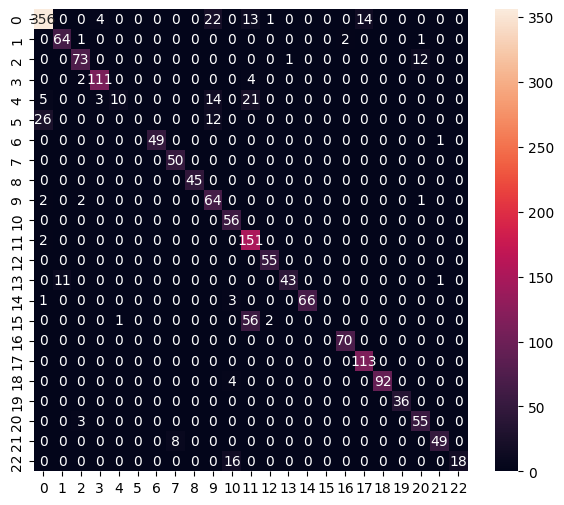

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       410
           1       0.85      0.94      0.90        68
           2       0.90      0.85      0.87        86
           3       0.94      0.95      0.94       117
           4       0.91      0.19      0.31        53
           5       0.00      0.00      0.00        38
           6       1.00      0.98      0.99        50
           7       0.86      1.00      0.93        50
           8       1.00      1.00      1.00        45
           9       0.57      0.93      0.71        69
          10       0.71      1.00      0.83        56
          11       0.62      0.99      0.76       153
          12       0.95      1.00      0.97        55
          13       0.98      0.78      0.87        55
          14       1.00      0.94      0.97        70
          15       0.00      0.00      0.00        59
          16       0.97      1.00      0.99        70
     

c:\users\adity\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adity\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adity\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\users\adity\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\adity\AppData\Local\Temp\tmpu1uf4iwc\assets


INFO:tensorflow:Assets written to: C:\Users\adity\AppData\Local\Temp\tmpu1uf4iwc\assets


7380

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9399430e-01 1.3978987e-11 1.3735843e-07 2.4520338e-03 9.7226241e-04
 2.5536553e-03 4.3249283e-18 2.7016013e-11 4.4386468e-09 2.9667925e-07
 2.0808142e-11 3.4230584e-07 9.2199703e-12 5.4202180e-14 4.3105830e-10
 8.9876221e-07 1.3696043e-10 6.7204293e-13 1.9365611e-06 3.8683260e-13
 1.2066878e-11 1.4513783e-05 9.6570220e-06]
0
